## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
df = pd.read_csv('../data/employee_data_cleaned.csv')
pd.options.display.max_columns = None
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [163]:
df.columns[:5]

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department'], dtype='object')

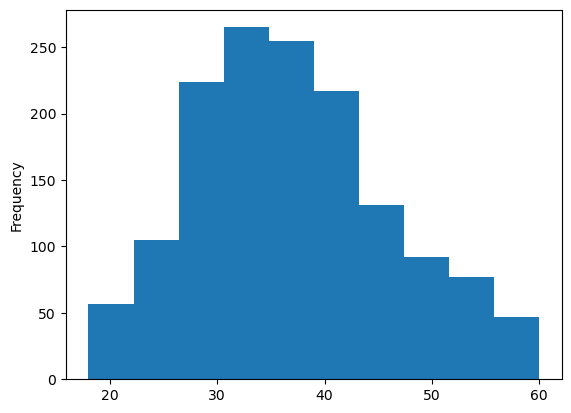

In [28]:
df.Age.plot(kind='hist', bins=10);

In [52]:
df['Attrition'].map({1:'Yes', 0:'No'})

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [54]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

/Users/atigon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


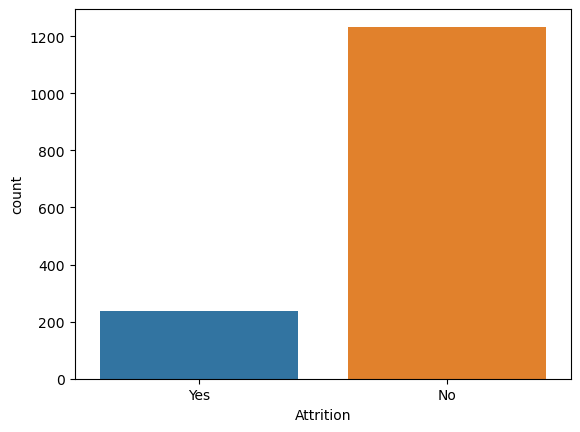

In [69]:
sns.countplot(df['Attrition'].map({1:'Yes', 0:'No'}));

In [31]:
df.BusinessTravel.value_counts(normalize=True)

1    0.897959
0    0.102041
Name: BusinessTravel, dtype: float64

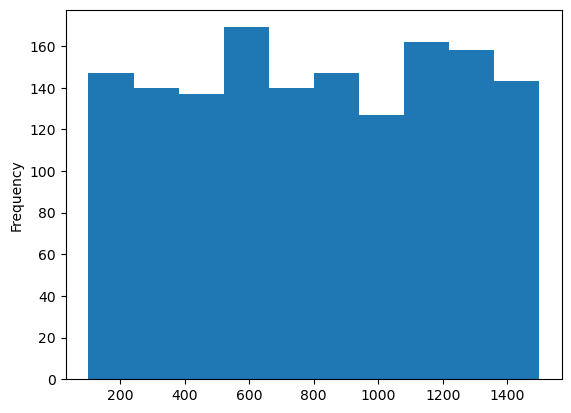

In [37]:
df.DailyRate.plot(kind='hist');

In [89]:
df[(df.Age>55) & (df.Age<61)].Attrition.value_counts(normalize=True)

0    0.829787
1    0.170213
Name: Attrition, dtype: float64

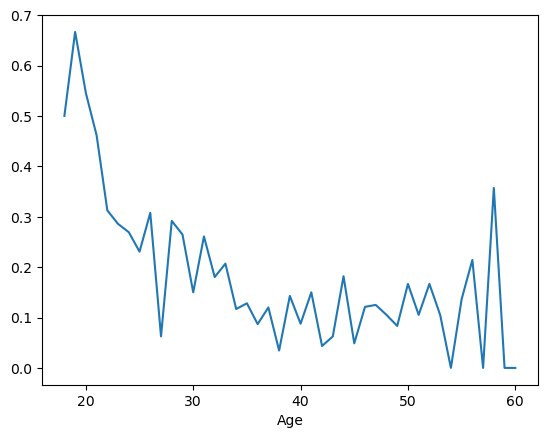

In [135]:
df.groupby(by='Age')['Attrition'].mean().plot(kind='line');

# This says we should group by
# 18-24 Very high (4)
# 25-34 High (3)
# 35-44 Low (1)
# 45-55 Medium (2)
# 55-60 High (3)

In [142]:
df.groupby(by='BusinessTravel')['Attrition'].mean()

# Attrition goes double if employee have to travel

BusinessTravel
0    0.080000
1    0.170455
Name: Attrition, dtype: float64

In [144]:
df.groupby(by='Department')['Attrition'].mean()

Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

In [162]:
df.columns[5:10]

Index(['DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber'],
      dtype='object')

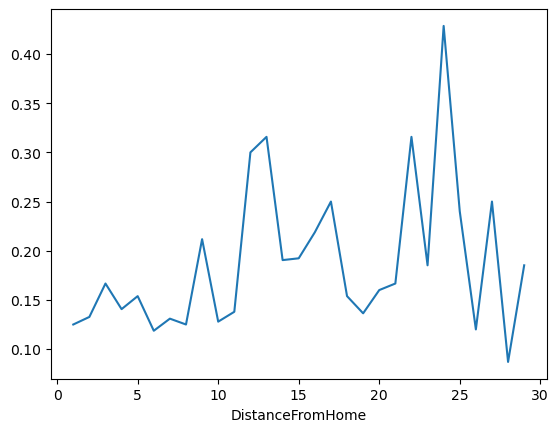

In [148]:
df.groupby(by='DistanceFromHome')['Attrition'].mean().plot(kind='line');
# low 0-10
# med 11-20
# high 21-30

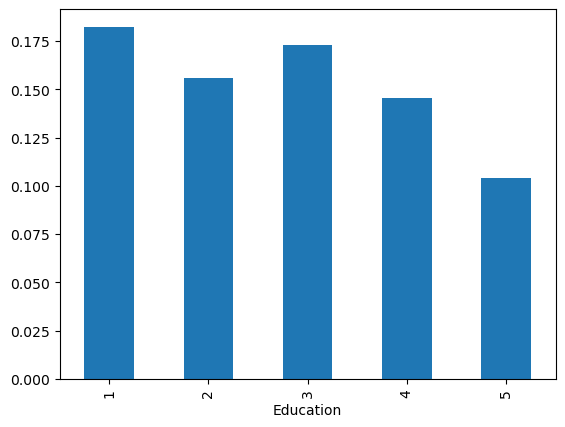

In [156]:
df.groupby(by='Education')['Attrition'].mean().plot(kind='bar');
# Ph.D. is lowest

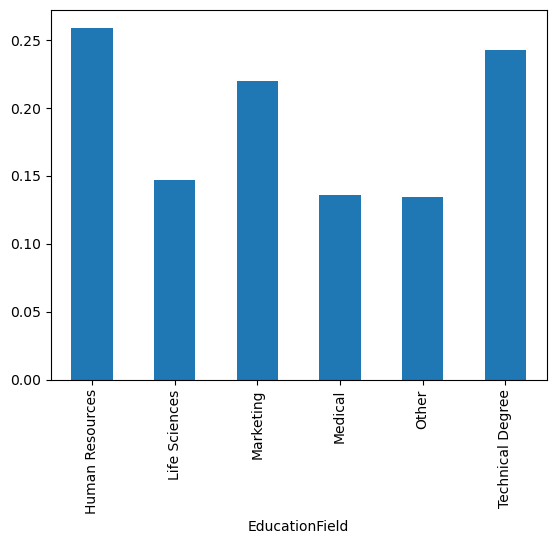

In [157]:
df.groupby(by='EducationField')['Attrition'].mean().plot(kind='bar');

In [191]:
df.columns[10:15].values

array(['EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel'], dtype=object)

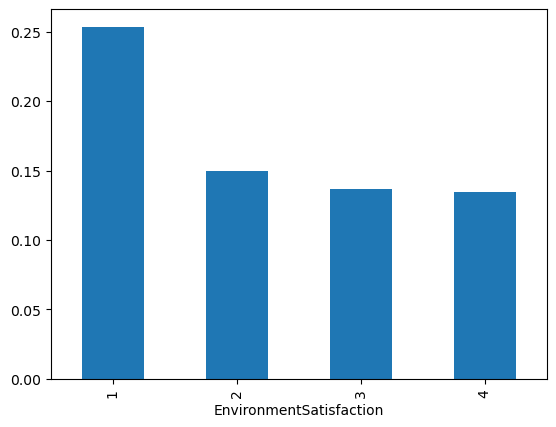

In [218]:
# EnvironmentSatisfaction
df.groupby(by='EnvironmentSatisfaction')['Attrition'].mean().plot(kind='bar');
# level 1 highly related

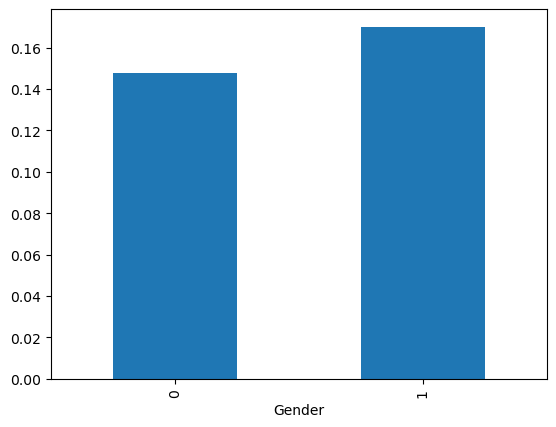

In [219]:
# Gender
df.groupby(by='Gender')['Attrition'].mean().plot(kind='bar');

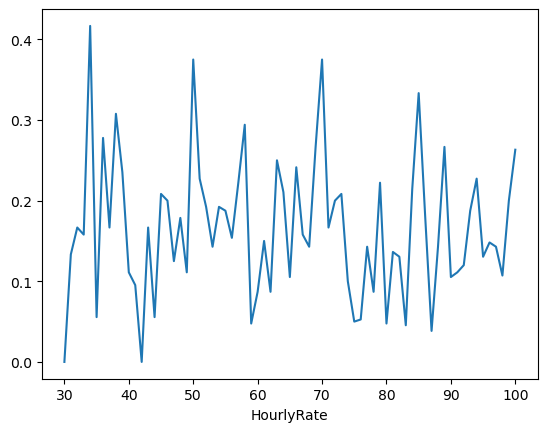

In [221]:
# HourlyRate
df.groupby(by='HourlyRate')['Attrition'].mean().plot(kind='line');
# not related

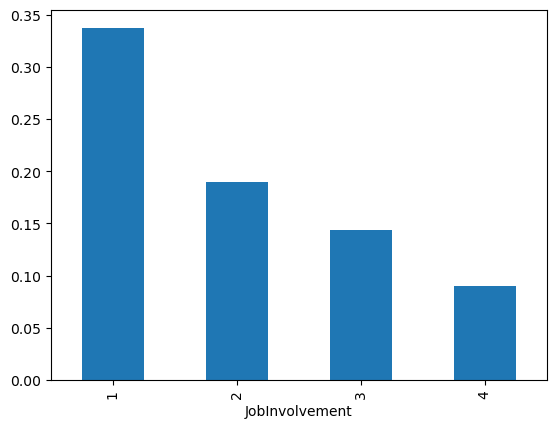

In [222]:
# JobInvolvement
df.groupby(by='JobInvolvement')['Attrition'].mean().plot(kind='bar');
# level 1 - highly related, level 2-3 - medium related, level 4 - low related

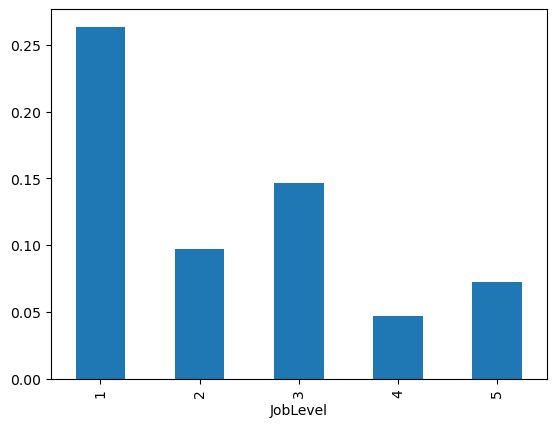

In [223]:
# JobLevel
df.groupby(by='JobLevel')['Attrition'].mean().plot(kind='bar');
# level 1 - related

In [197]:
df.columns[15:20].values

array(['JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate'], dtype=object)

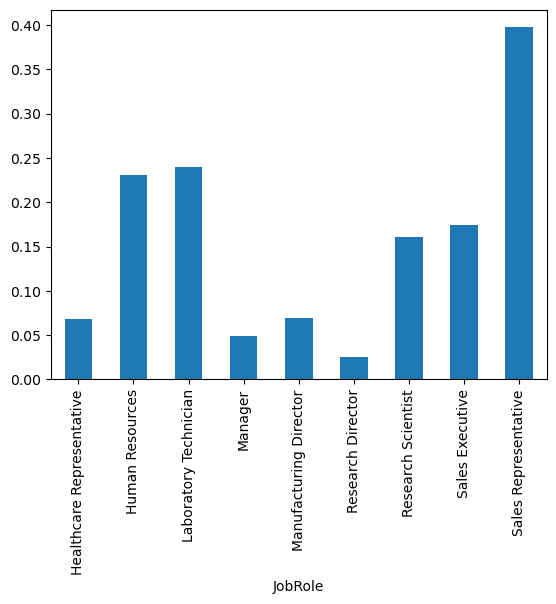

In [224]:
# JobRole
df.groupby(by='JobRole')['Attrition'].mean().plot(kind='bar');
# high - sales_rep
# med - hr, lab_tec, res_sci, sales_exec
# low - hea_rep, mgr, man_dir, res_dir

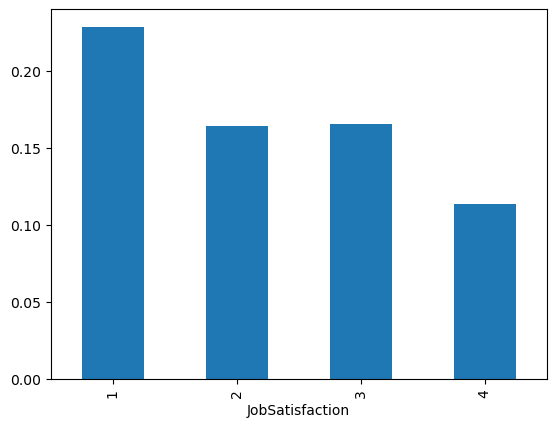

In [225]:
# JobSatisfaction
df.groupby(by='JobSatisfaction')['Attrition'].mean().plot(kind='bar');
# level 1 - related

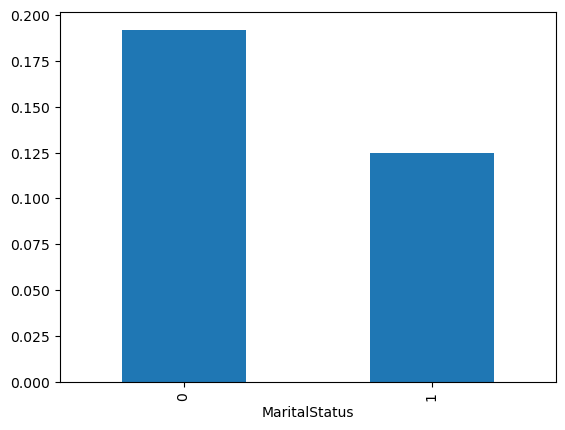

In [226]:
# MaritalStatus
df.groupby(by='MaritalStatus')['Attrition'].mean().plot(kind='bar');
# single related

In [308]:
def salary_range(salary):
    if salary<2500:
        return 1250
    elif salary<5000:
        return 3750
    elif salary<7500:
        return 6250
    elif salary<10000:
        return 8750
    elif salary<12500:
        return 11250
    elif salary<15000:
        return 13750
    elif salary<17500:
        return 16250
    elif salary<20000:
        return 18750
    elif salary<25000:
        return 21250
    else:
        return 23750

In [309]:
df['salary_range'] = df['MonthlyIncome'].apply(salary_range)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,salary_range
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,6250
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,6250
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,1250
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,3750
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,1,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3,3750
1466,39,0,1,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7,8750
1467,27,0,1,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,1,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3,6250
1468,49,0,1,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,1,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8,6250


Monthly income < 2000, attrition rate = 0.5454545454545454


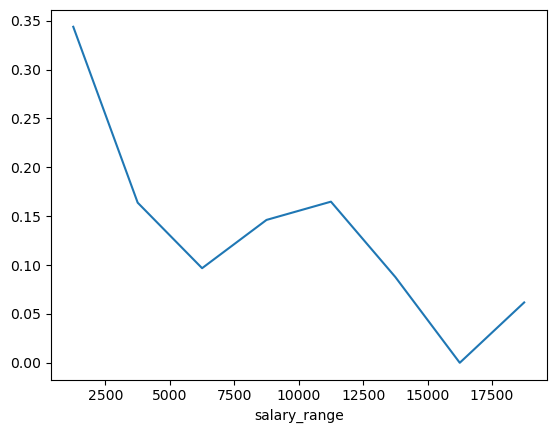

In [310]:
# MonthlyIncome
df.groupby(by='salary_range')['Attrition'].mean().plot(kind='line');
# low salary matter
print('Monthly income < 2000, attrition rate =', df[df['MonthlyIncome'] < 2000]['Attrition'].mean())

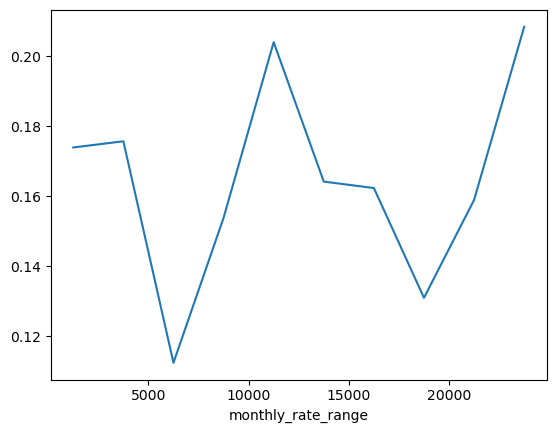

In [312]:
# MonthlyRate
df['monthly_rate_range'] = df['MonthlyRate'].apply(salary_range)

df.groupby(by='monthly_rate_range')['Attrition'].mean().plot(kind='line');
# no significant relations

In [313]:
df.columns[20:25].values

array(['NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating'], dtype=object)

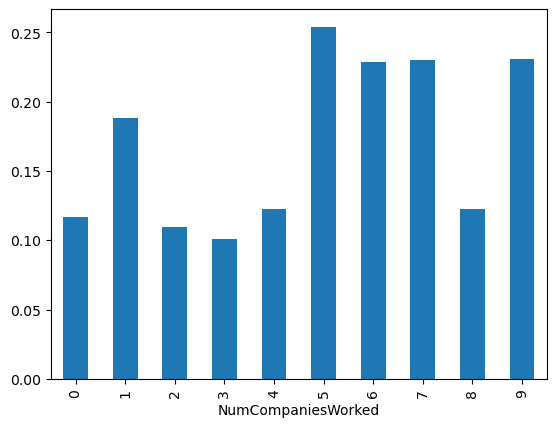

In [317]:
# NumCompaniesWorked
df.groupby(by='NumCompaniesWorked')['Attrition'].mean().plot(kind='bar');

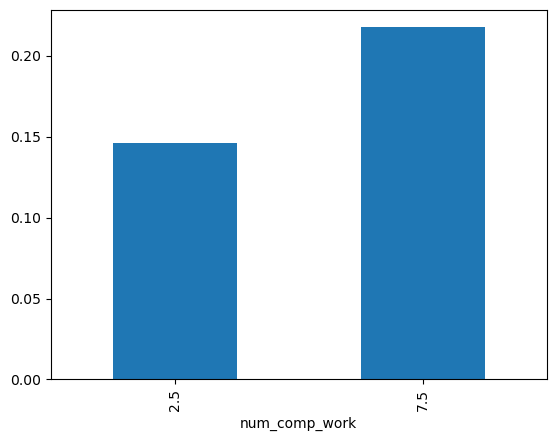

In [326]:
df['num_comp_work'] = df['NumCompaniesWorked'].map(lambda x: 2.5 if x < 5 else 7.5)
df.groupby(by='num_comp_work')['Attrition'].mean().plot(kind='bar');

In [325]:
df.NumCompaniesWorked.value_counts(normalize=True)

1    0.354422
0    0.134014
3    0.108163
2    0.099320
4    0.094558
7    0.050340
6    0.047619
5    0.042857
9    0.035374
8    0.033333
Name: NumCompaniesWorked, dtype: float64

In [332]:
# Over18
print(df['Over18'].value_counts(normalize=True))

# All rows are over 18, will drop this
df.drop(columns='Over18', inplace=True)

KeyError: 'Over18'

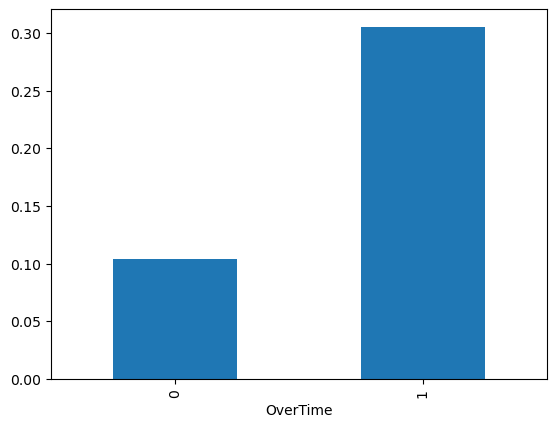

In [334]:
# OverTime
df.groupby(by='OverTime')['Attrition'].mean().plot(kind='bar');
# Very high related

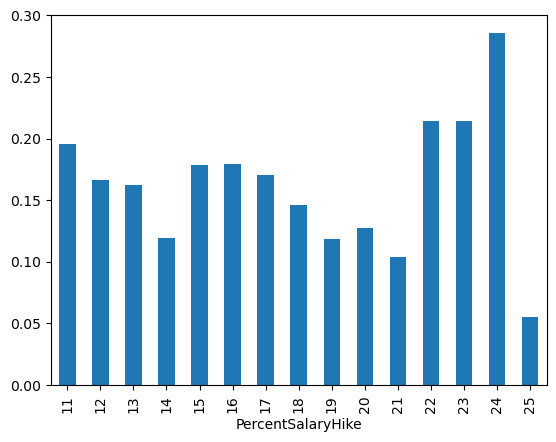

In [345]:
# PercentSalaryHike
df.groupby(by='PercentSalaryHike')['Attrition'].mean().plot(kind='bar');
# no significant relations

{3, 4}


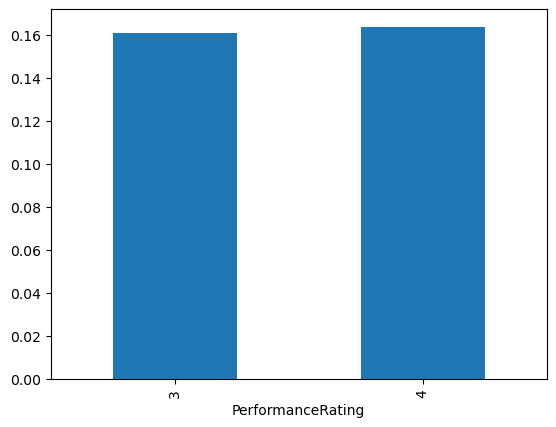

In [348]:
# PerformanceRating
df.groupby(by='PerformanceRating')['Attrition'].mean().plot(kind='bar');
print(set(df['PerformanceRating']))
# no significant relations

In [211]:
df.columns[25:30].values

array(['RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear'], dtype=object)

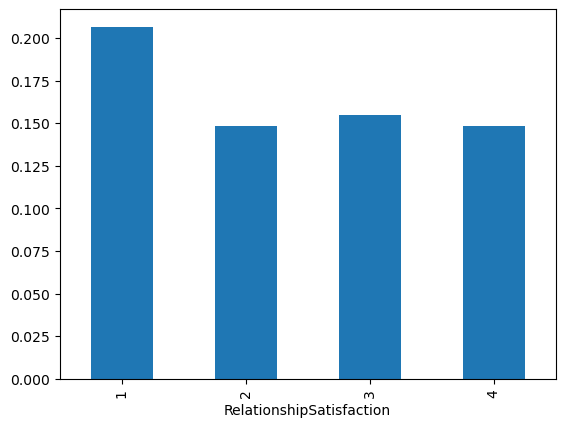

In [349]:
# RelationshipSatisfaction
df.groupby(by='RelationshipSatisfaction')['Attrition'].mean().plot(kind='bar');

In [353]:
# StandardHours
df.StandardHours.value_counts(normalize=True)

# All are the same, will drop this column
df.drop(columns='StandardHours', inplace=True)

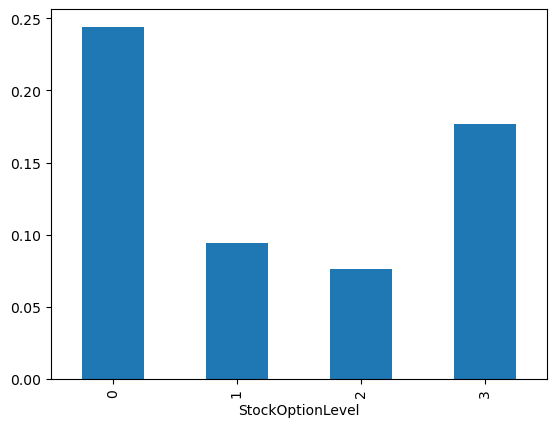

In [355]:
# StockOptionLevel
df.groupby(by='StockOptionLevel')['Attrition'].mean().plot(kind='bar');
# low & high stock option are related

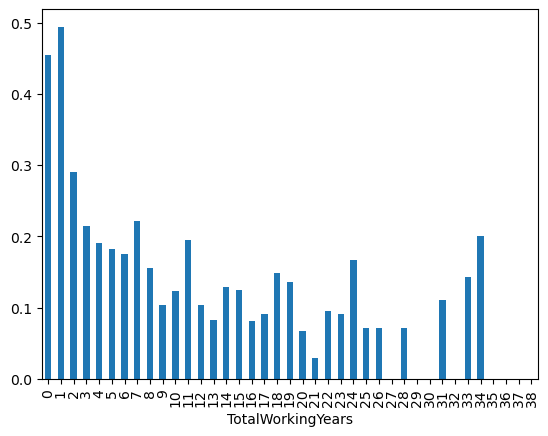

In [373]:
# TotalWorkingYears
df.groupby(by='TotalWorkingYears')['Attrition'].mean().plot(kind='bar');
# 0-2 years matter
# over 35 years super matter 100% stays
# 40 years should be remove
df = df[df['TotalWorkingYears']!=40]

In [372]:
df[df['TotalWorkingYears']>=35]['Attrition'].value_counts()

0    14
Name: Attrition, dtype: int64

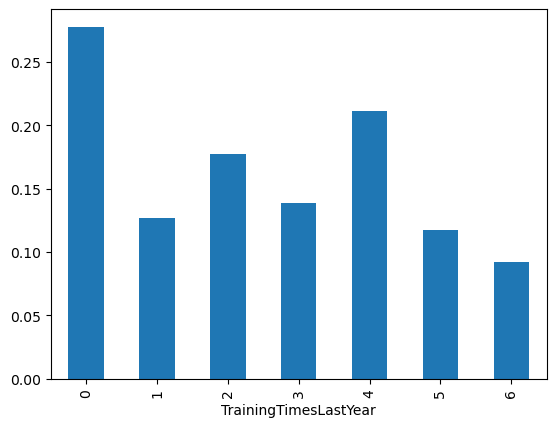

In [375]:
# TrainingTimesLastYear
df.groupby(by='TrainingTimesLastYear')['Attrition'].mean().plot(kind='bar');
# Zero training time matters

In [213]:
df.columns[30:35].values

array(['WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

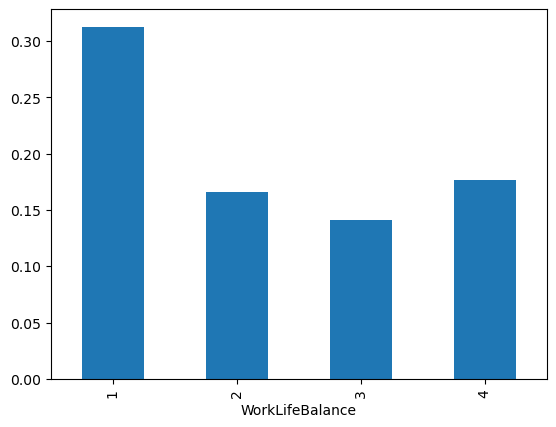

In [377]:
# WorkLifeBalance
df.groupby(by='WorkLifeBalance')['Attrition'].mean().plot(kind='bar');
# work life balance matters at double

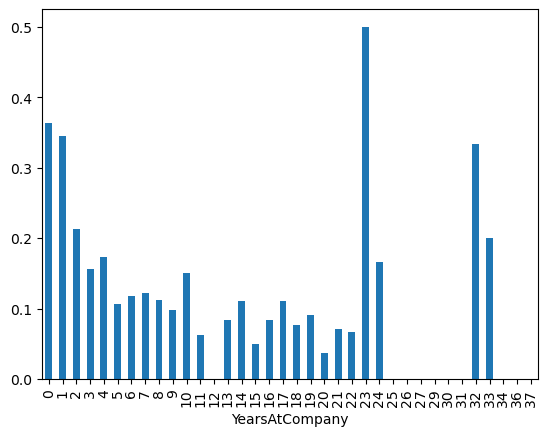

In [378]:
# YearsAtCompany
df.groupby(by='YearsAtCompany')['Attrition'].mean().plot(kind='bar');

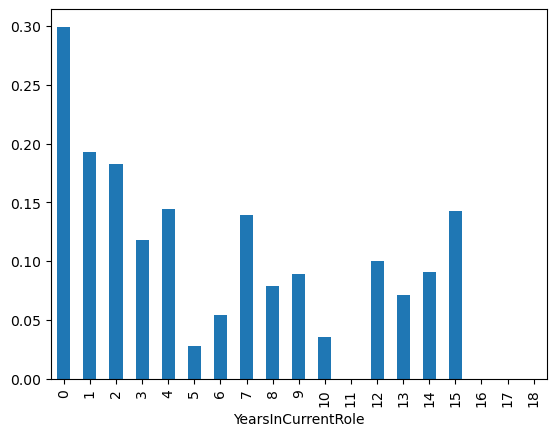

In [387]:
# YearsInCurrentRole
df.groupby(by='YearsInCurrentRole')['Attrition'].mean().plot(kind='bar');
# First year matter

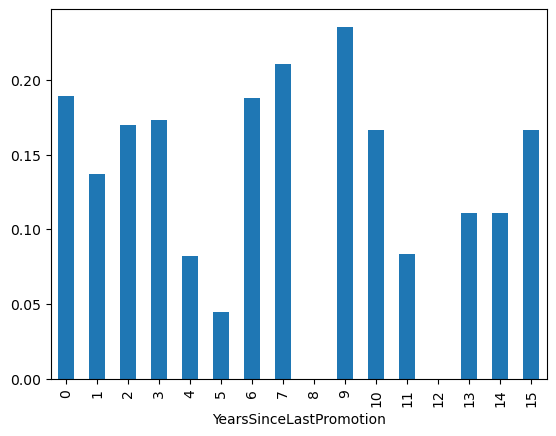

In [388]:
# YearsSinceLastPromotion
df.groupby(by='YearsSinceLastPromotion')['Attrition'].mean().plot(kind='bar');

# No significant

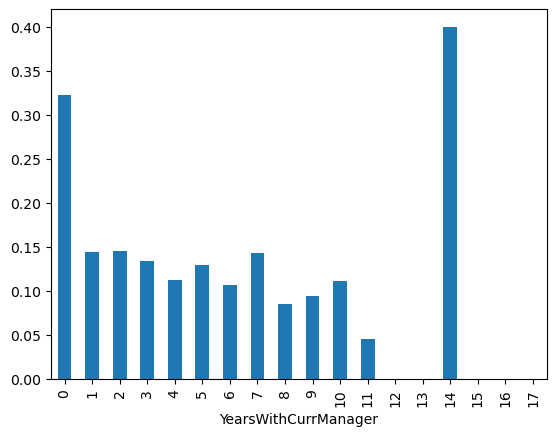

In [392]:
# YearsWithCurrManager
df.groupby(by='YearsWithCurrManager')['Attrition'].mean().plot(kind='bar');
# First year matter then spike at exactly 14 years

In [393]:
df.to_csv('../data/employee_data_clean_eda', index=False)